In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx

In [4]:
data = pd.read_csv("../data/completed_tasks.csv")  # Replace with the actual path

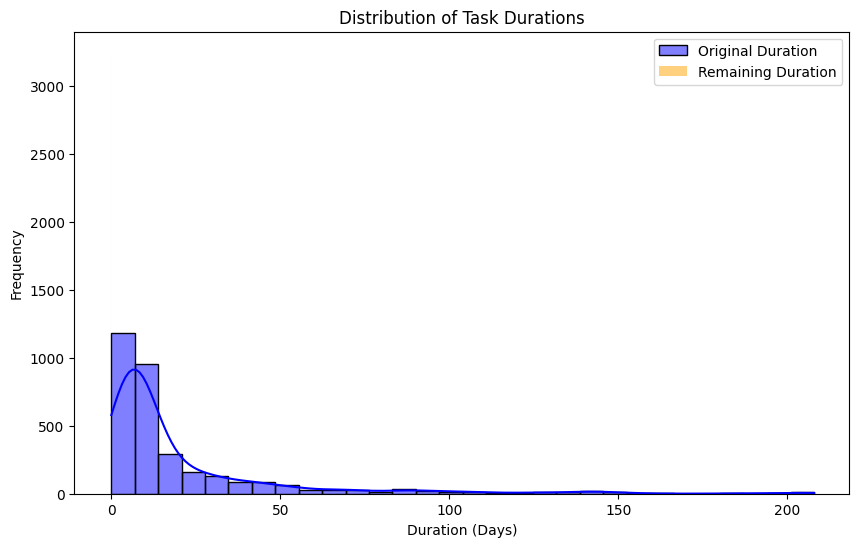

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Original Duration'], kde=True, bins=30, color='blue', label='Original Duration')
sns.histplot(data['Remaining Duration'], kde=True, bins=30, color='orange', label='Remaining Duration')
plt.title('Distribution of Task Durations')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
gantt_data = data[['Activity ID', 'Baseline Start', 'Baseline Finish', 'Delay_Status']].dropna()
gantt_chart = px.timeline(
    gantt_data,
    x_start='Baseline Start',
    x_end='Baseline Finish',
    y='Activity ID',
    color='Delay_Status',
    title='Gantt Chart of Activities'
)
gantt_chart.update_yaxes(categoryorder="total ascending")
gantt_chart.show()

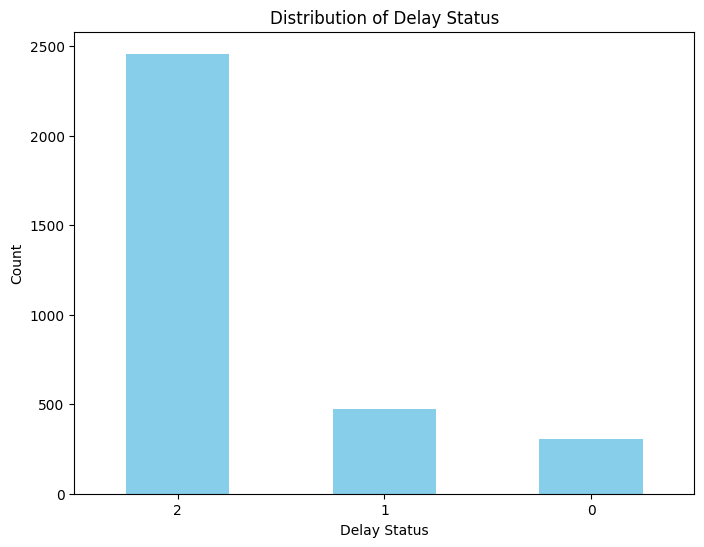

In [7]:
plt.figure(figsize=(8, 6))
data['Delay_Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Delay Status')
plt.xlabel('Delay Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

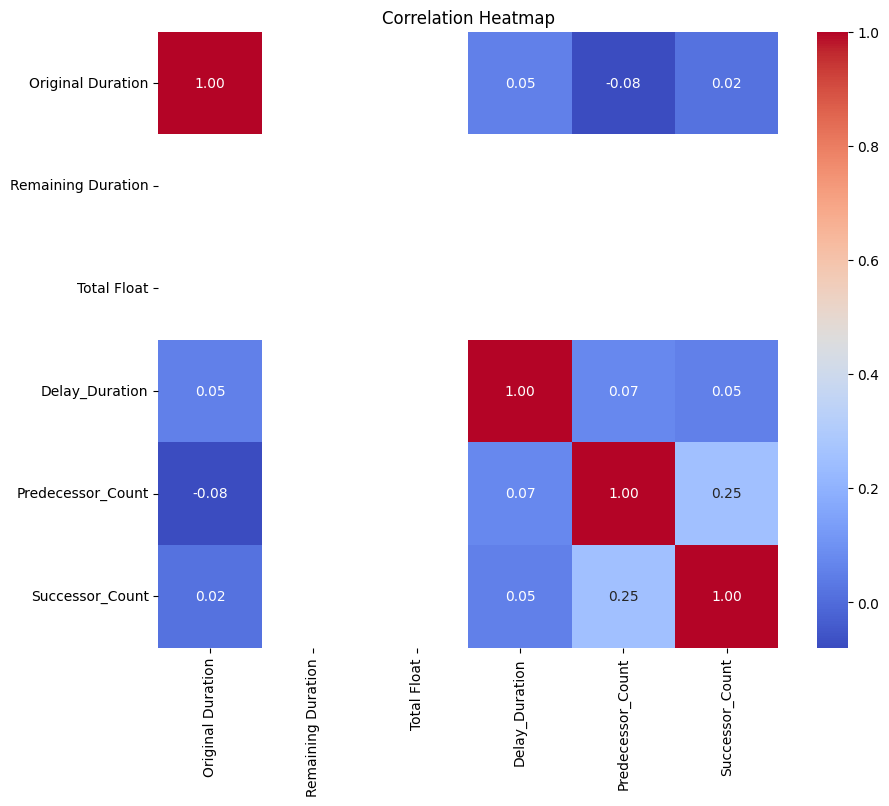

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Original Duration', 'Remaining Duration', 'Total Float', 'Delay_Duration', 'Predecessor_Count', 'Successor_Count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12744\3625588804.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




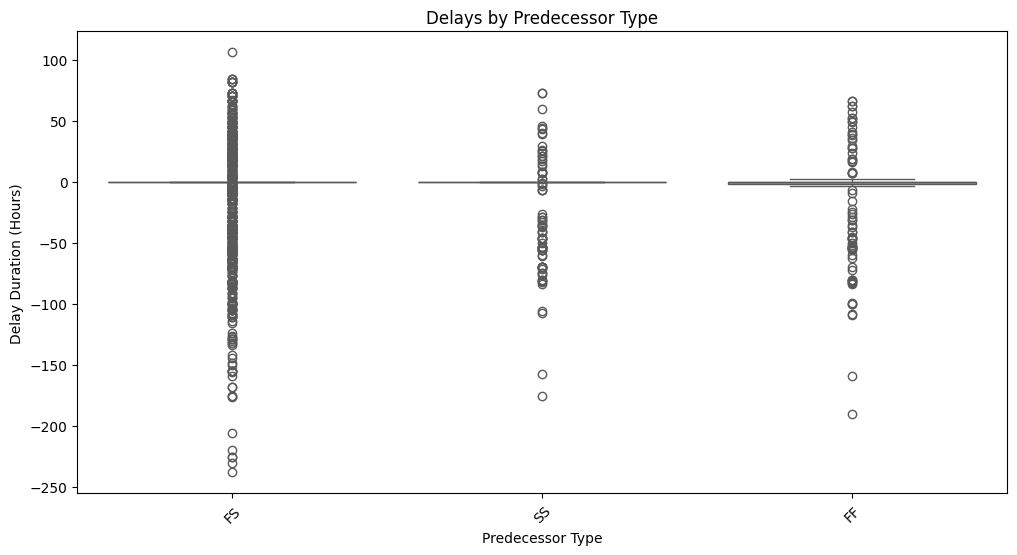

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='pred_type', y='Delay_Duration', data=data, palette='Set2')
plt.title('Delays by Predecessor Type')
plt.xlabel('Predecessor Type')
plt.ylabel('Delay Duration (Hours)')
plt.xticks(rotation=45)
plt.show()

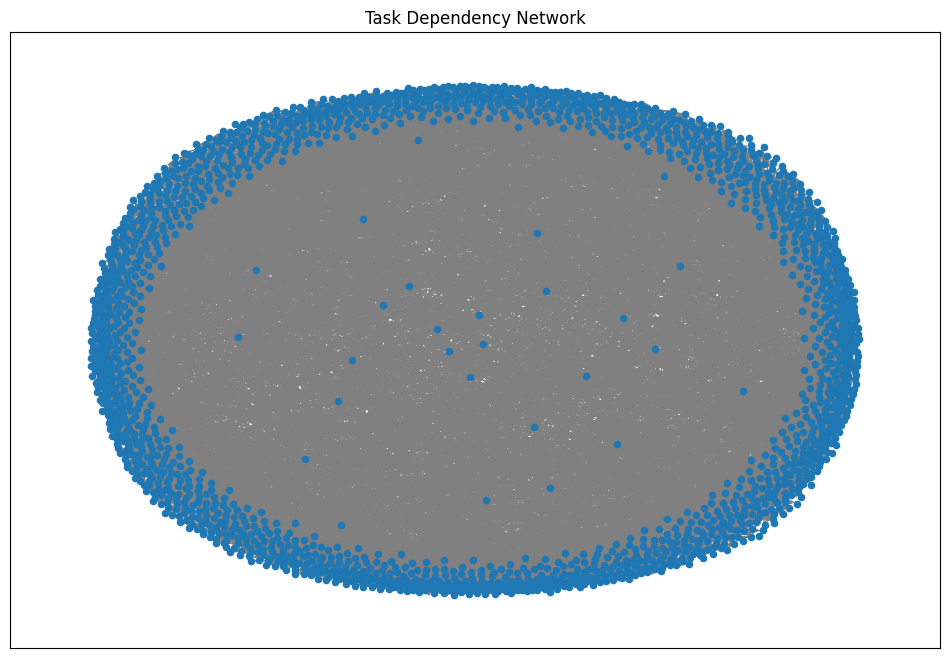

In [10]:
def create_dependency_graph(df):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        if pd.notna(row['pred_task_id']):
            G.add_edge(row['pred_task_id'], row['Activity ID'], weight=row.get('lag_hr_cnt', 0))
    return G

graph_data = data[['Activity ID', 'pred_task_id', ]].dropna()
G = create_dependency_graph(graph_data)
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, with_labels=False, node_size=20, font_size=8, edge_color='gray')
plt.title('Task Dependency Network')
plt.show()

In [11]:
len(data['Activity ID'].unique())

1953

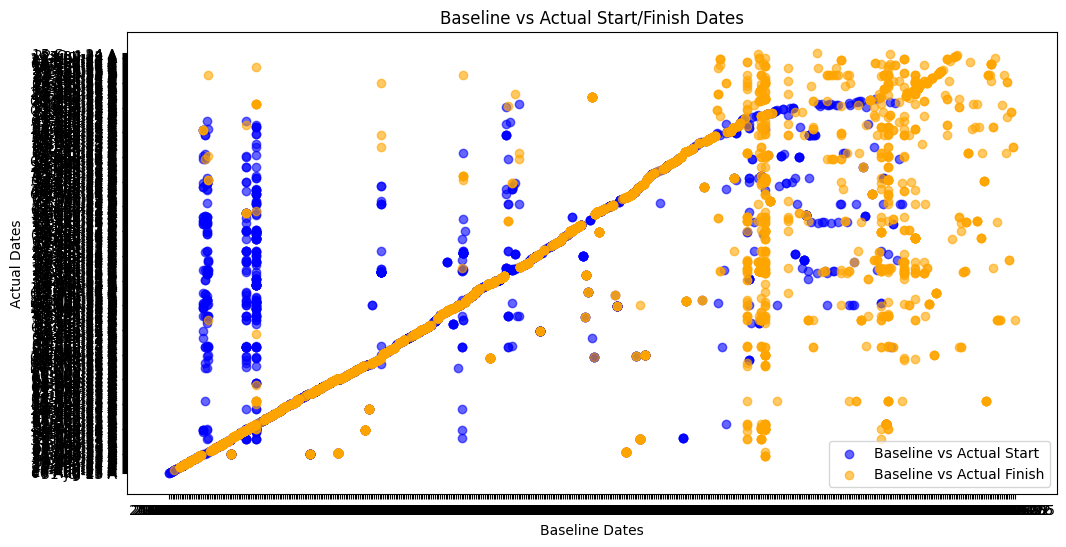

In [12]:
# 7. Baseline vs Actual Start/Finish
plt.figure(figsize=(12, 6))
plt.scatter(data['Baseline Start'], data['Start'], color='blue', alpha=0.6, label='Baseline vs Actual Start')
plt.scatter(data['Baseline Finish'], data['Finish'], color='orange', alpha=0.6, label='Baseline vs Actual Finish')
plt.title('Baseline vs Actual Start/Finish Dates')
plt.xlabel('Baseline Dates')
plt.ylabel('Actual Dates')
plt.legend()
plt.show()

In [13]:
data

,Activity ID,Activity Name,Original Duration,Remaining Duration,Baseline Start,Baseline Finish,Start,Finish,Total Float,task_code,...,task_id,pred_type,PREDTASK__status_code,TASK__status_code,lag_hr_cnt,delete_record_flag_y,Delay_Duration,Delay_Status,Predecessor_Count,Successor_Count
0,HC-GN-0010,Issue ICR-Planning Package,8,0,2023-07-31,2023-08-10,31-Jul-23 A,10-Aug-23 A,NaN,HC-GN-0010,...,HC-GN-0010,FS,Completed,Completed,4,NaN,0,2,1,3
1,HC-GN-0020,Receive Company Comments-Planning Package,7,0,2023-08-06,2023-08-16,06-Aug-23 A,16-Aug-23 A,NaN,HC-GN-0020,...,HC-GN-0020,FS,Completed,Completed,0,NaN,0,2,1,1
2,HC-GN-0030,Re-Issue for Approval-Planning Package,4,0,2023-08-20,2023-08-25,20-Aug-23 A,25-Aug-23 A,NaN,HC-GN-0030,...,HC-GN-0030,FS,Completed,Completed,0,NaN,0,2,1,1
3,HC-GN-0040,Obtain Company Approval-Planning Package,5,0,2023-08-26,2023-09-04,26-Aug-23 A,04-Sep-23 A,NaN,HC-GN-0040,...,HC-GN-0040,FS,Completed,Completed,0,NaN,0,2,1,1
4,HC-GN-0050,Final Issue for Design/ Construction-Planning ...,43,0,2023-08-28,2023-10-26,28-Aug-23 A,26-Oct-23 A,NaN,HC-GN-0050,...,HC-GN-0050,FS,Completed,Completed,0,NaN,0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,C-52-598-04-CI-1000,"Site Survey, Preparation & Grading Works",34,0,2024-05-27,2024-07-10,27-May-24 A,10-Jul-24 A,NaN,C-52-598-04-CI-1000,...,C-52-598-04-CI-1000,FS,Completed,Completed,0,NaN,0,2,3,1
3233,C-4N-H5HG-PIPEL-1000,Survey Marking,29,0,2024-06-14,2024-07-23,14-Jun-24 A,23-Jul-24 A,NaN,C-4N-H5HG-PIPEL-1000,...,C-4N-H5HG-PIPEL-1000,FF,Completed,Completed,0,NaN,0,2,4,3
3234,C-4N-H5HG-PIPEL-1000,Survey Marking,29,0,2024-06-14,2024-07-23,14-Jun-24 A,23-Jul-24 A,NaN,C-4N-H5HG-PIPEL-1000,...,C-4N-H5HG-PIPEL-1000,FS,Completed,Completed,0,NaN,0,2,4,3
3235,C-4N-H5HG-PIPEL-1000,Survey Marking,29,0,2024-06-14,2024-07-23,14-Jun-24 A,23-Jul-24 A,NaN,C-4N-H5HG-PIPEL-1000,...,C-4N-H5HG-PIPEL-1000,FS,Completed,Completed,0,NaN,0,2,4,3


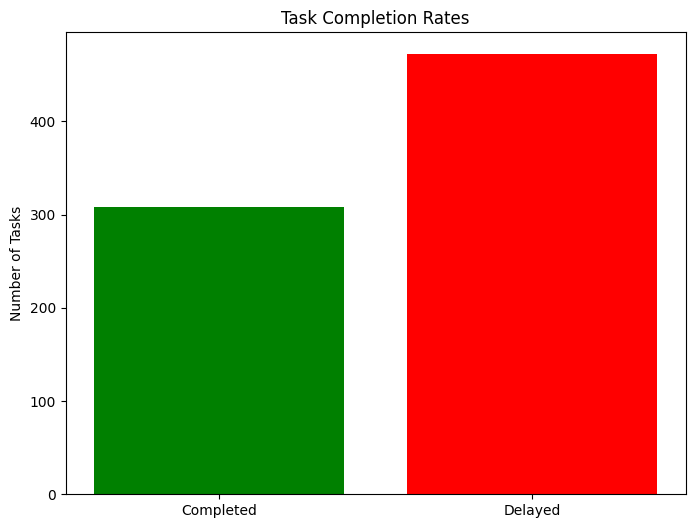

In [14]:
# 8. Task Completion Rates
completed_tasks = data[data['Delay_Status'] == 0].shape[0]
delayed_tasks = data[data['Delay_Status'] == 1].shape[0]
plt.figure(figsize=(8, 6))
plt.bar(['Completed', 'Delayed'], [completed_tasks, delayed_tasks], color=['green', 'red'])
plt.title('Task Completion Rates')
plt.ylabel('Number of Tasks')
plt.show()

In [15]:
plt.figure(figsize=(12, 6))
data['Month'] = data['Baseline Start'].dt.to_period('M')
monthly_tasks = data.groupby('Month')['Activity ID'].count()
monthly_tasks.plot(kind='line', marker='o', color='purple')
plt.title('Number of Tasks Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tasks')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1200x600 with 0 Axes>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12744\905145525.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




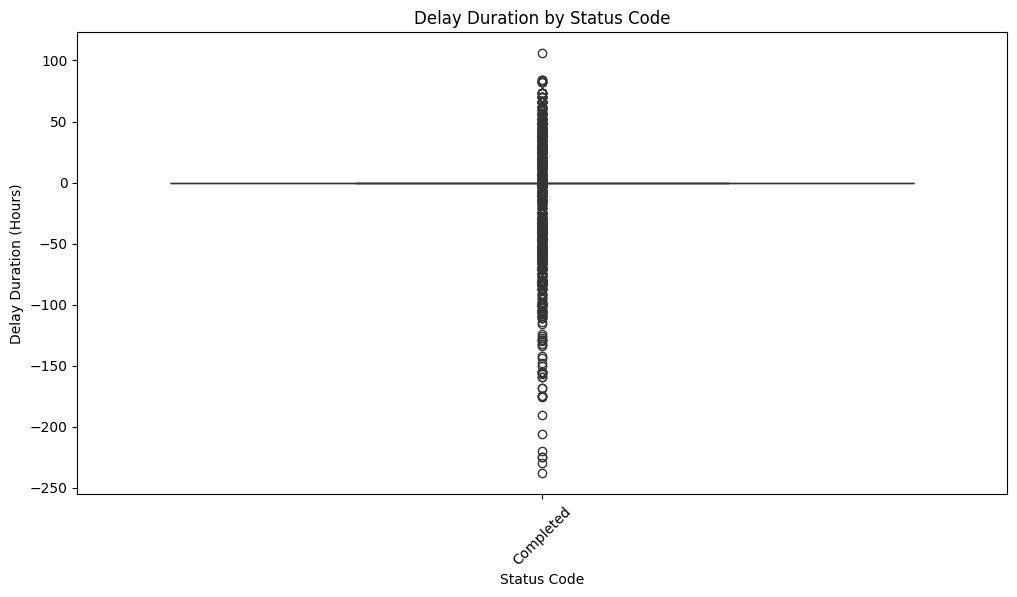

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='status_code', y='Delay_Duration', data=data, palette='viridis')
plt.title('Delay Duration by Status Code')
plt.xlabel('Status Code')
plt.ylabel('Delay Duration (Hours)')
plt.xticks(rotation=45)
plt.show()

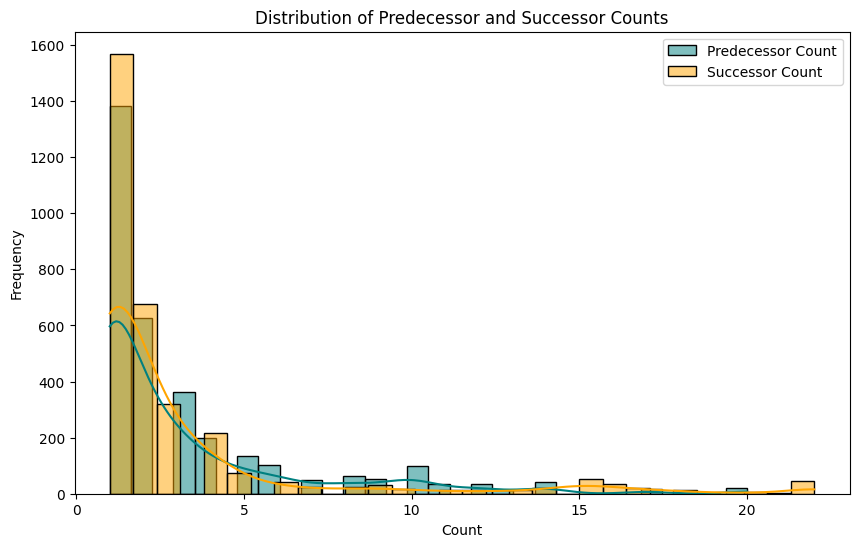

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Predecessor_Count'], kde=True, bins=30, color='teal', label='Predecessor Count')
sns.histplot(data['Successor_Count'], kde=True, bins=30, color='orange', label='Successor Count')
plt.title('Distribution of Predecessor and Successor Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


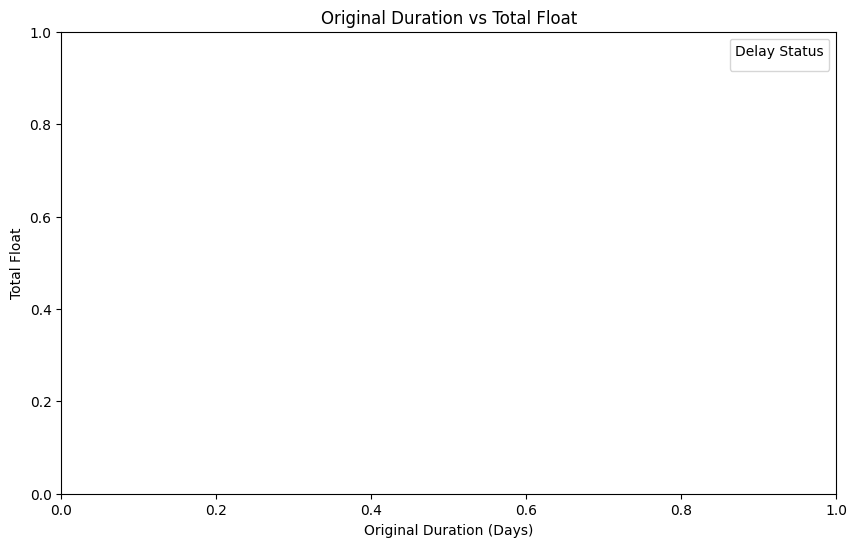

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Original Duration', y='Total Float', hue='Delay_Status', data=data, palette='coolwarm')
plt.title('Original Duration vs Total Float')
plt.xlabel('Original Duration (Days)')
plt.ylabel('Total Float')
plt.legend(title='Delay Status', loc='upper right')
plt.show()

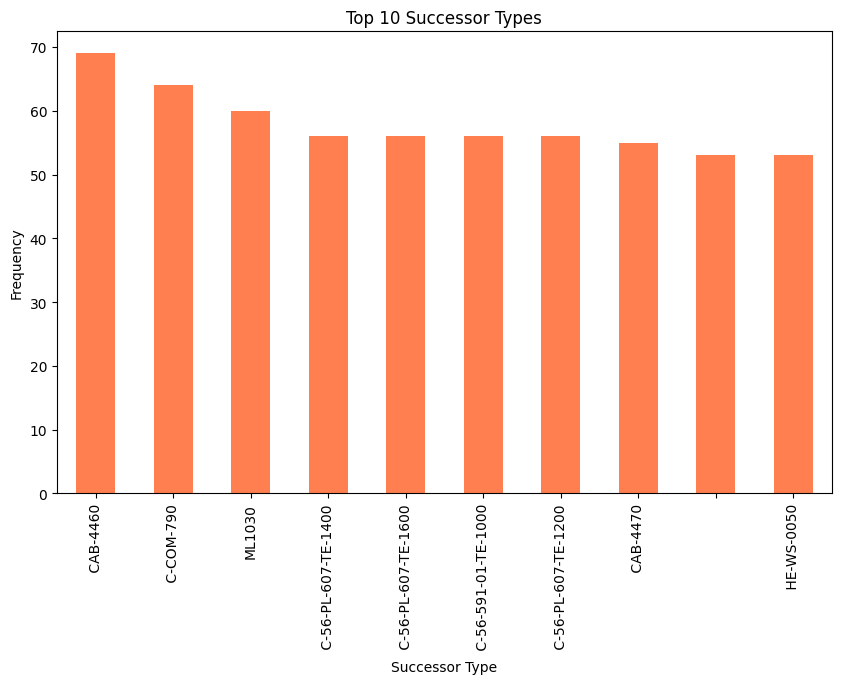

In [19]:
succ_counts = data['succ_list'].str.split(',').explode().value_counts().head(10)
succ_counts.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title('Top 10 Successor Types')
plt.xlabel('Successor Type')
plt.ylabel('Frequency')
plt.show()

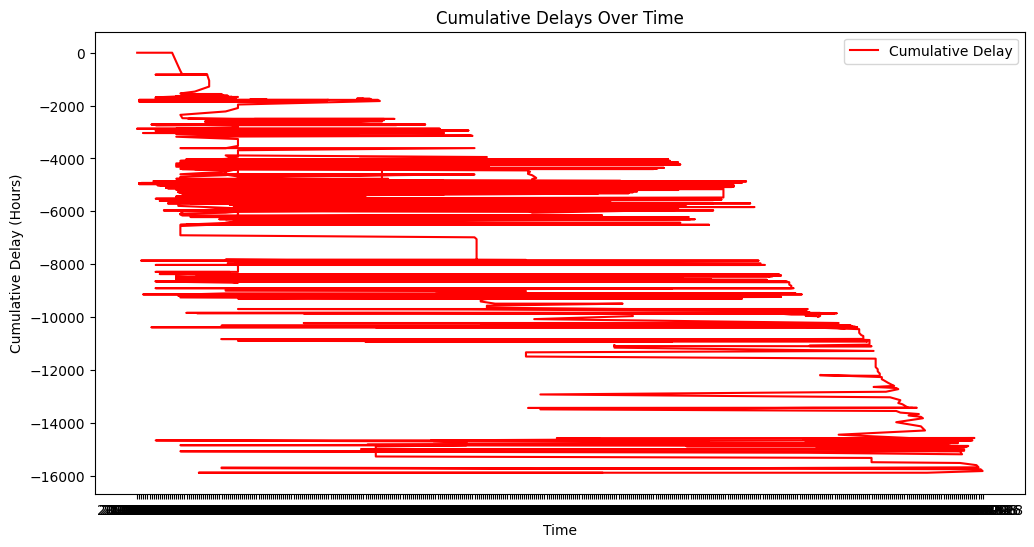

In [20]:
data['Cumulative Delay'] = data['Delay_Duration'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(data['Baseline Start'], data['Cumulative Delay'], color='red', label='Cumulative Delay')
plt.title('Cumulative Delays Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Delay (Hours)')
plt.legend()
plt.show()

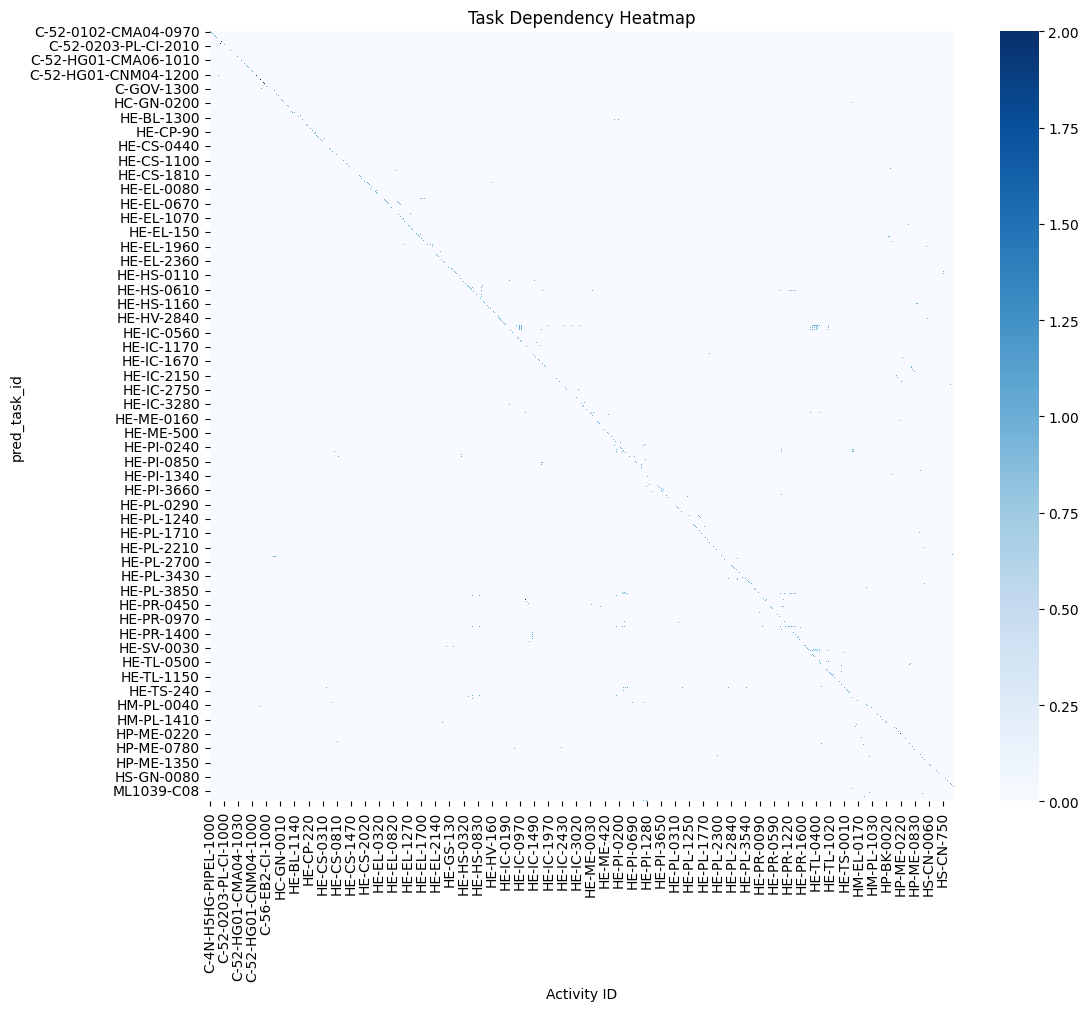

In [21]:
dependency_matrix = pd.crosstab(data['pred_task_id'], data['Activity ID'])
plt.figure(figsize=(12, 10))
sns.heatmap(dependency_matrix, cmap='Blues', cbar=True)
plt.title('Task Dependency Heatmap')
plt.show()